In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Happy-Sad Emotion Classification Using Deep Learning**

In [14]:
%cd '/content/drive/MyDrive/ happy-sad-cnn'

[Errno 2] No such file or directory: '/content/drive/MyDrive/ happy-sad-cnn'
/content/drive/MyDrive/ Happy-Sad Emotion Classification Using Deep Learning


In [4]:
%pip install tensorflow

## **Required Stuff**

In [5]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [6]:
data = tf.keras.utils.image_dataset_from_directory('data',batch_size=32,image_size=(256,256),shuffle=True)

Found 305 files belonging to 2 classes.


In [7]:
Ouput_Labels = data.class_names
print(f"Output Labels: {Ouput_Labels}")

Output Labels: ['happy', 'sad']


In [8]:
print('The no.of batches : ',len(data))
print('Total Images :',len(data)*8)

The no.of batches :  10
Total Images : 80




```
 **Iterator**: An object in Python that allows sequential traversal of elements using `next()`.  
- **NumPy Iterator**: A specialized iterator that retrieves batches of data from a dataset in NumPy array format.
```



In [9]:
## For example
iterator = data.as_numpy_iterator()
images,labels = next(iterator)
print(f"images size : {images.shape} and labels size : {labels.shape}") # it printing the a batche of images size and its labels
print(images);print(labels)

images size : (32, 256, 256, 3) and labels size : (32,)
[[[[110.       105.        83.      ]
   [111.       106.        84.      ]
   [111.       106.        86.      ]
   ...
   [115.5      110.586914  88.32617 ]
   [112.       110.        85.      ]
   [112.5      110.5       85.5     ]]

  [[110.       105.        85.      ]
   [111.       106.        86.      ]
   [111.       106.        86.      ]
   ...
   [115.5      110.5       89.5     ]
   [115.       111.        86.      ]
   [114.73926  110.73926   85.73926 ]]

  [[110.       105.        85.      ]
   [111.       106.        86.      ]
   [111.       106.        86.      ]
   ...
   [115.5      111.5       86.23828 ]
   [115.56543  111.56543   86.56543 ]
   [114.5      110.5       85.5     ]]

  ...

  [[  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   ...
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0

THE DATA IS SHUFFELING
The Batch is:  0
For the 1 batch the image is size (32, 256, 256, 3) and the label size is (32,)
Type of the image: <class 'numpy.ndarray'> and label <class 'numpy.ndarray'>
--------------------------------------------------


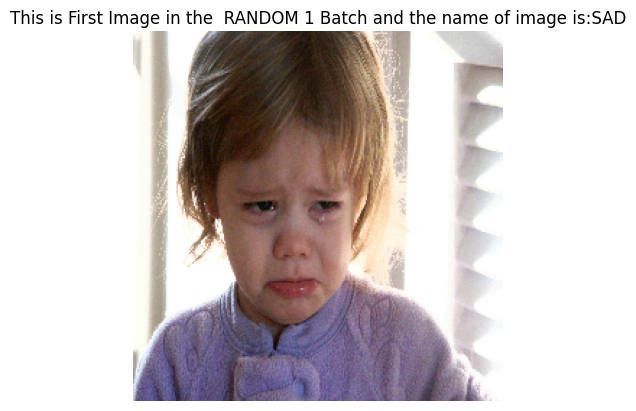

In [10]:
## Ploting the images
print(f"THE DATA IS SHUFFELING")
for batch_no, batch in enumerate(data): # I can use someting called I data.take(spefic_number)
    print('The Batch is: ',batch_no)
    image,label = batch
    print(f"For the {batch_no+1} batch the image is size {image.shape} and the label size is {label.shape}")
    print(f"Type of the image: {type(image.numpy())} and label {type(label.numpy())}")
    plt.imshow(image[0].numpy().astype('uint8'))
    plt.title(f'This is First Image in the  RANDOM {batch_no+1} Batch and the name of image is:{Ouput_Labels[label[0].numpy()].upper()}')
    plt.axis('off')
    print(f"-----"*10)
    break

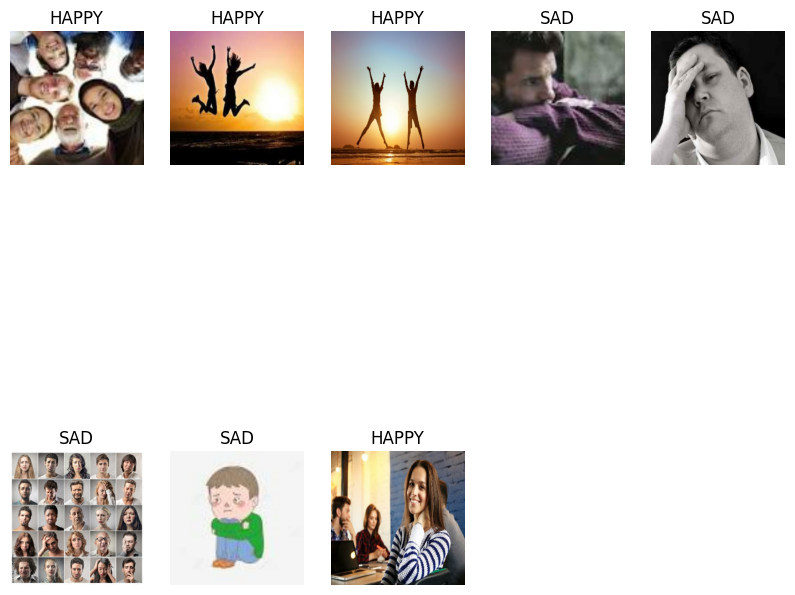

In [11]:
## Just ploting the 8 images of the random batch
for image,label in data.take(1):
    plt.figure(figsize=(10,10))
    for i in range(8):
        plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(f'{Ouput_Labels[label[i].numpy()].upper()}')
        plt.axis('off')

In [12]:
## Scaling the data
data = data.map(lambda x,y: (x/255, y))

In [13]:
### Splitting The Data
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [14]:
train_data = data.take(train_size)
val_data   = data.skip(train_size).take(val_size)
test_data   = data.skip(train_size+val_size).take(test_size)

In [15]:
print(f"Bathes in train data: {len(train_data)}")
print(f"Bathes in val data: {len(val_data)}")
print(f"Bathes in test data: {len(test_data)}")

Bathes in train data: 7
Bathes in val data: 2
Bathes in test data: 1


In [16]:
## Building the model
model = Sequential()
model.add(Conv2D(filters=132,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 132)       │           3,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 132)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          76,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       7,373,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,471,569 (28.50 MB)

 Trainable params: 7,471,569 (28.50 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
## Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='adam',metrics=['accuracy'])

In [19]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [20]:
## Training the model
history = model.fit(train_data,epochs=25,validation_data=val_data,callbacks=[tensorboard_callback])

Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.5103 - loss: 1.3628 - val_accuracy: 0.4219 - val_loss: 0.6952
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4722 - loss: 0.6911 - val_accuracy: 0.7969 - val_loss: 0.6708
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 775ms/step - accuracy: 0.6622 - loss: 0.6659 - val_accuracy: 0.8125 - val_loss: 0.6432
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7254 - loss: 0.6081 - val_accuracy: 0.8125 - val_loss: 0.6037
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 795ms/step - accuracy: 0.7610 - loss: 0.5419 - val_accuracy: 0.8438 - val_loss: 0.4270
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 878ms/step - accuracy: 0.7913 - loss: 0.4527 - val_accuracy: 0.6875 - val_loss: 0.5156
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 757ms/step - accuracy: 0.7577 - loss: 0.4968 - val_accuracy: 0.8438 - val_loss: 0.3251
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 999ms/step - accuracy: 0.8675 - loss: 0.3482 - val_accuracy: 0.8906 - val_loss: 0.2649


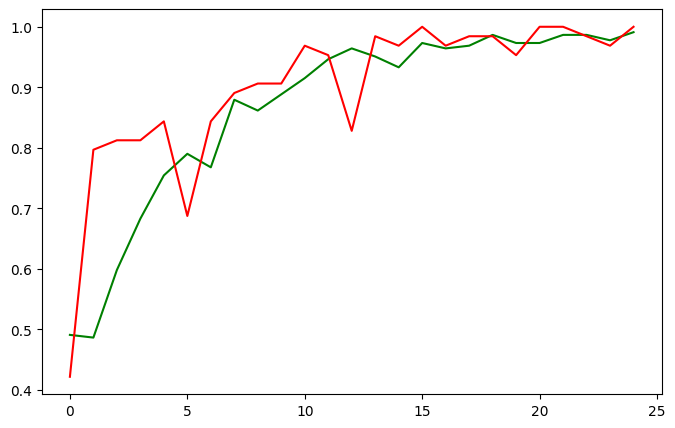

In [21]:
##plotign accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'],color='green',label='accuracy')
plt.plot(history.history['val_accuracy'],color='red',label='val_accuracy')

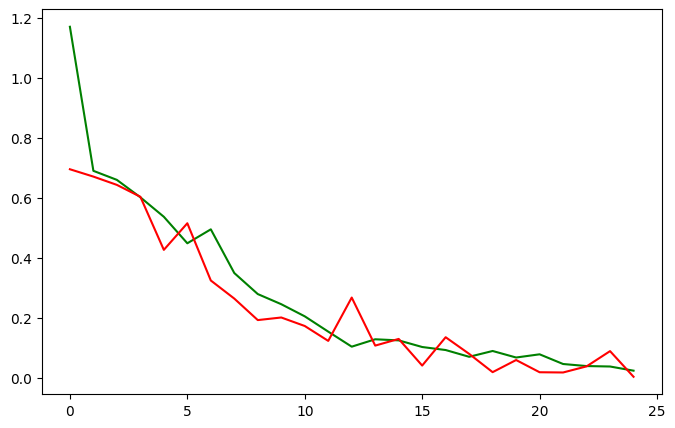

In [22]:
## ploting the loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'],color='green',label='loss')
plt.plot(history.history['val_loss'],color='red',label='val_loss')

In [23]:
###Mertics
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [24]:
pre = Precision()
reca = Recall()
acc = BinaryAccuracy()

In [25]:
for batch_no, batch in enumerate(test_data):
    print('The Batch is: ',batch_no)
    image,label = batch
    yhat = model.predict(image)
    pre.update_state(label, yhat)
    reca.update_state(label, yhat)
    acc.update_state(label, yhat)

The Batch is:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [26]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9412 - loss: 0.0439
Test Loss: 0.043932847678661346
Test Accuracy: 0.9411764740943909


In [27]:
print(f"Precission: {pre.result()} Recall: {reca.result()} Accuracy: {acc.result()}")

Precission: 1.0 Recall: 1.0 Accuracy: 1.0


THE DATA IS SHUFFELING
The Batch is:  0
For the 1 batch the image is size (17, 256, 256, 3) and the label size is (17,)
Type of the image: <class 'numpy.ndarray'> and label <class 'numpy.ndarray'>


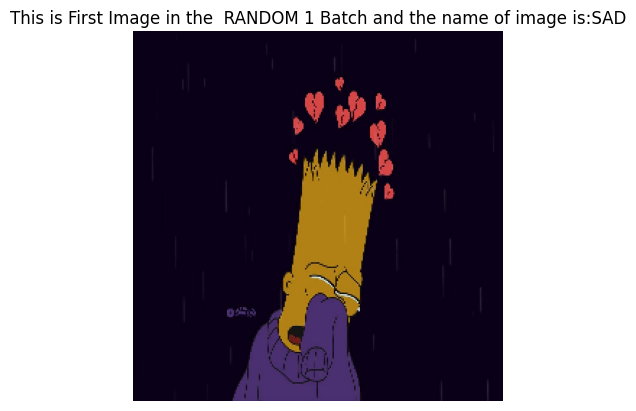

--------------------------------------------------


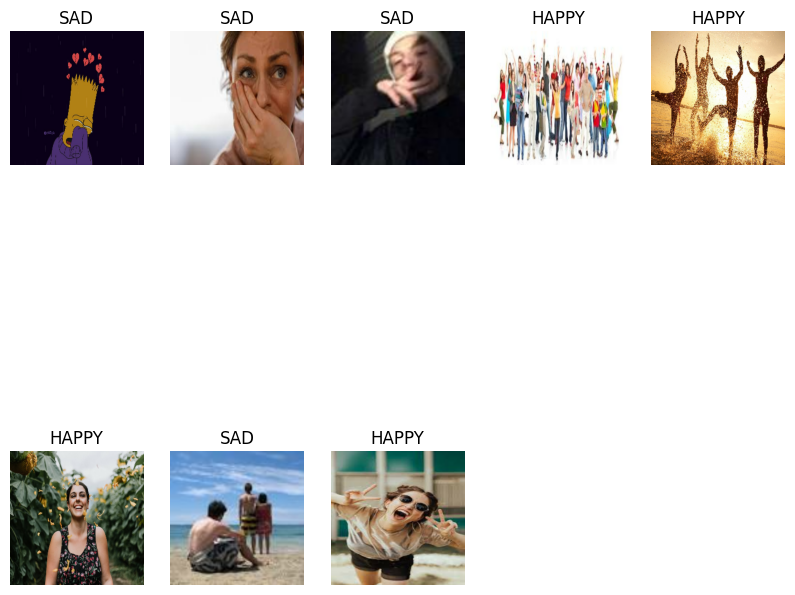

In [28]:
## Ploting the images TEST Images
print(f"THE DATA IS SHUFFELING")
for batch_no, batch in enumerate(test_data): # I can use someting called I data.take(spefic_number)
    print('The Batch is: ',batch_no)
    image,label = batch
    print(f"For the {batch_no+1} batch the image is size {image.shape} and the label size is {label.shape}")
    print(f"Type of the image: {type(image.numpy())} and label {type(label.numpy())}")
    plt.imshow((image[0].numpy()*255).astype('uint8'))
    plt.title(f'This is First Image in the  RANDOM {batch_no+1} Batch and the name of image is:{Ouput_Labels[label[0].numpy()].upper()}')
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(10,10))
    for i in range(8):

        plt.subplot(2,5,i+1)
        plt.imshow((image[i].numpy()*255).astype('uint8'))
        plt.title(f'{Ouput_Labels[label[i].numpy()].upper()}')
        plt.axis('off')
    print(f"-----"*10)
    break

## **TEST FOR NEW IMAGE**

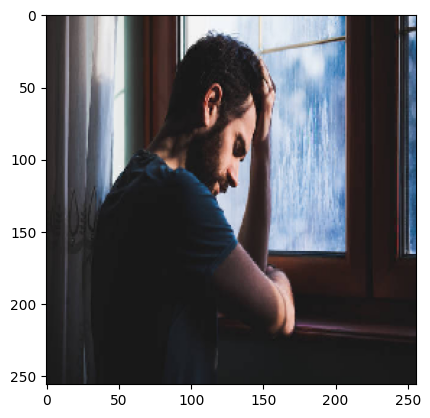

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
It is the sad


In [29]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
new_test_img = 'sad.jpg'

# Load and preprocess the image
img = load_img(new_test_img, target_size=(256, 256))  # Resize the image to (256, 256)
img = img_to_array(img)
plt.imshow(img.astype('uint8'))
plt.show()
img = np.expand_dims(img, axis=0)  # Add batch dimension
img_scaled = img / 255

# Make the prediction
prediction = model.predict(img_scaled)

if prediction >=0.5:
    print('It is the sad')
else:
    print('It is Happy')

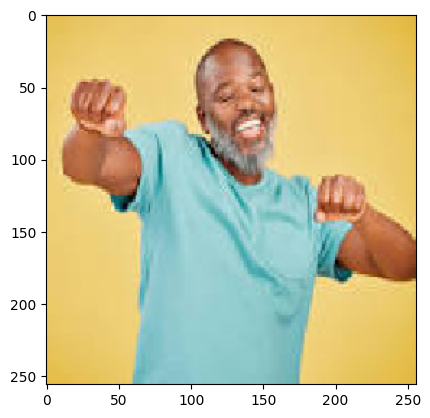

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
It is Happy


In [30]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
new_test_img = 'happy.jpg'

# Load and preprocess the image
img = load_img(new_test_img, target_size=(256, 256))  # Resize the image to (256, 256)
img = img_to_array(img)
plt.imshow(img.astype('uint8'))
plt.show()
img = np.expand_dims(img, axis=0)  # Add batch dimension
img_scaled = img / 255

# Make the prediction
prediction = model.predict(img_scaled)

if prediction >=0.5:
    print('It is the sad')
else:
    print('It is Happy')

## **Saving Model**

In [31]:
model.save(os.path.join('models','imageclassifier.h5'))

In [32]:
model = load_model('models/imageclassifier.h5')

In [33]:
model.predict(img_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


array([[2.2889824e-06]], dtype=float32)

In [34]:
!pip install pyngrok

In [35]:
!pip install streamlit pyngrok --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [36]:
!ngrok authtoken 2v8IErM2RUw5XMxVY7So64ZjDTD_84ZXker1rbHkRLt1b5TK7


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [37]:
!streamlit run app.py &>/dev/null&


In [39]:
from pyngrok import ngrok

# Start ngrok tunnel
public_url = ngrok.connect(8501, "http").public_url
print(f"🌍 Open the Web App here: {public_url}")


🌍 Open the Web App here: https://dab3-34-124-131-79.ngrok-free.app


In [8]:
!apt-get install git -qq
!git config --global user.email "vishnuvardhankalva8@email.com"  # Use your GitHub email
!git config --global user.name "iamvishno"       # Your GitHub username

In [10]:
!git clone https://github.com/iamvishno/Happy-Sad-Emotion-Classification-Using-Deep-Learning.git
#%cd Happy-Sad-Emotion-Classification-Using-Deep-Learning

Cloning into 'Happy-Sad-Emotion-Classification-Using-Deep-Learning'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), done.
